# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data = pd.merge(mouse_metadata, study_results, how="right", on="Mouse ID")

# Display the data table for preview
study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [3]:
# Checking the number of mice.
number_mice = study_data["Mouse ID"].nunique()
number_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = study_data[study_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice = duplicate_data['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = study_data[study_data['Mouse ID'].isin(duplicate_mice)==False]
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice = cleaned_data["Mouse ID"].nunique()
cleaned_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_mean = cleaned_data.groupby("Drug Regimen").mean(numeric_only=True)["Tumor Volume (mm3)"]
drug_median = cleaned_data.groupby("Drug Regimen").median(numeric_only=True)["Tumor Volume (mm3)"]
drug_variance = cleaned_data.groupby("Drug Regimen").var(numeric_only=True)["Tumor Volume (mm3)"]
drug_std = cleaned_data.groupby("Drug Regimen").std(numeric_only=True)["Tumor Volume (mm3)"]
drug_sem = cleaned_data.groupby("Drug Regimen").sem(numeric_only=True)["Tumor Volume (mm3)"]
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_drug_regimen = pd.DataFrame({
    "Mean": drug_mean,
    "Median": drug_median,
    "Variance": drug_variance,
    "Std": drug_std,
    "SEM": drug_sem
})
summary_drug_regimen

,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

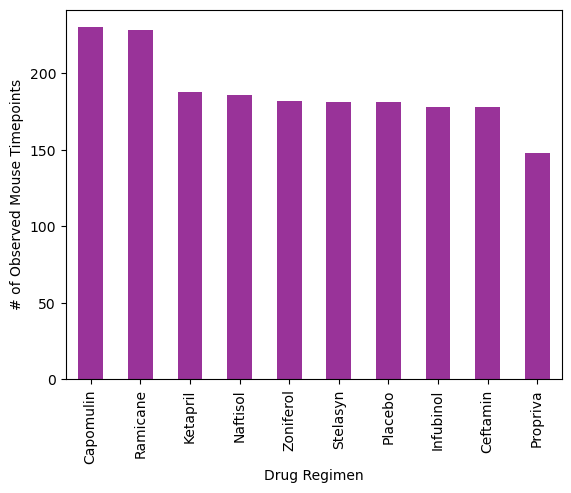

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_drug_count = cleaned_data["Drug Regimen"].value_counts()
total_drug_count.plot(kind='bar', color='purple', alpha=0.8)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

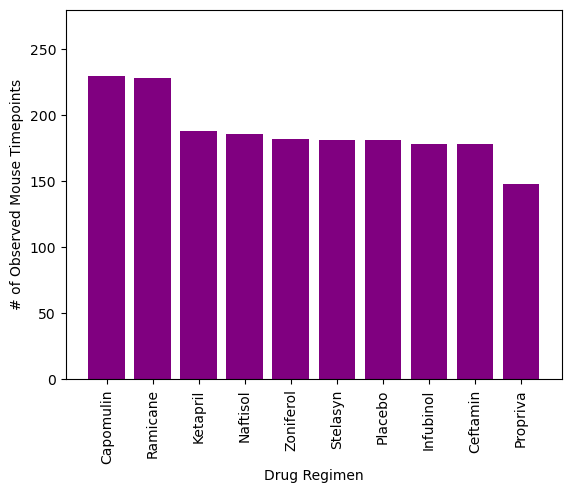

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mice_array = total_drug_count.tolist()
x_axis = np.arange(len(mice_array))

plt.bar(x_axis, mice_array, color="purple")
plt.xticks(x_axis, total_drug_count.index, rotation=90)
plt.ylim(0, max(mice_array)+50)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

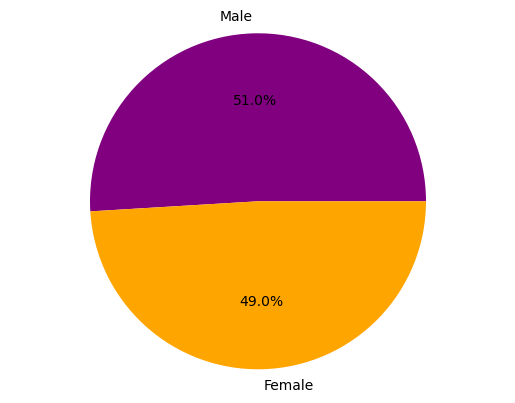

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
total_gender_count = cleaned_data["Sex"].value_counts()
gender_array = total_gender_count.tolist()
colours = ["purple", "orange"]

plt.pie(gender_array, labels=total_gender_count.index, colors=colours, autopct="%1.1f%%")
#plt.title
plt.axis("equal")
        
plt.show()

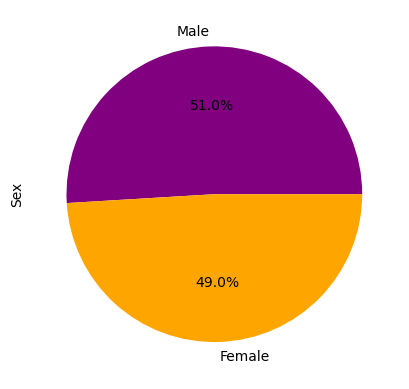

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#swap around
total_gender_count.plot(kind="pie", colors=["purple", "orange"], autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_data = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"]
ramicane_data = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Ramicane"]
infubinol_data = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Infubinol"]
ceftamin_data = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
capomulin_last = capomulin_data.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


Mouse ID
b128    45
b742    45
f966    20
g288    45
g316    45
i557    45
i738    45
j119    45
j246    35
l509    45
l897    45
m601    45
m957    45
r157    15
r554    45
r944    45
s185    45
s710    45
t565    45
u364    45
v923    45
w150    10
w914    45
x401    45
y793    45
Name: Timepoint, dtype: int64

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
